1. 머신러닝 (Machine Learning)
정의: 컴퓨터가 데이터로부터 학습하여 특정 작업을 수행하는 알고리즘을 개발하는 분야.

핵심 아이디어: 명시적인 프로그래밍 없이도 데이터의 패턴을 인식하거나 의사결정을 자동화한다.

예시: 스팸 메일 분류, 주가 예측, 얼굴 인식 등.

"머신러닝은 경험(E)을 통해 작업(T)의 성능(P)을 향상시키는 컴퓨터 프로그램의 연구이다."
- Tom Mitchell (1997)

2. 지도학습 (Supervised Learning)
정의: 레이블(정답)이 있는 데이터로 모델을 학습시켜 새로운 입력에 대한 예측을 하는 방법.

특징: 입력(X)과 출력(Y)의 관계를 학습한다.

예시:

분류(Classification): 스팸 vs. 일반 메일 구분

회귀(Regression): 집 크기 → 가격 예측

"지도학습은 함수
f
:
X
→
Y
f:X→Y를 학습하는 과정이다."

3. 비지도학습 (Unsupervised Learning)
정의: 레이블 없는 데이터에서 숨겨진 구조나 패턴을 발견하는 방법.

특징: 데이터의 자연스러운 군집(clustering)이나 차원 축소(dimensionality reduction)에 활용된다.

예시:

군집화(Clustering): 고객 세분화

연관 규칙(Association): 장바구니 분석 (A를 산 사람이 B도 산다)

"데이터의 내재된 구조를 탐색하는 것이 목표다."

간단 비교
구분	  | 데이터 형태	| 목적	| 예시
\
지도학습	|레이블 있음 (X → Y)|	정답 예측|	분류, 회귀
\
비지도학습	|레이블 없음 (X만)|	패턴 발견|	군집화, 차원 축소

초기 머신러닝 연구에서는 지도학습이 주류였지만, 현대에는 준지도학습(Semi-supervised)이나 강화학습(Reinforcement Learning) 등 다양한 패러다임이 등장.

Goals :
Learn to implement the model  𝑓𝑤,𝑏
  for linear regression with one variable

Notation :
Here is a summary of some of the notation you will encounter.

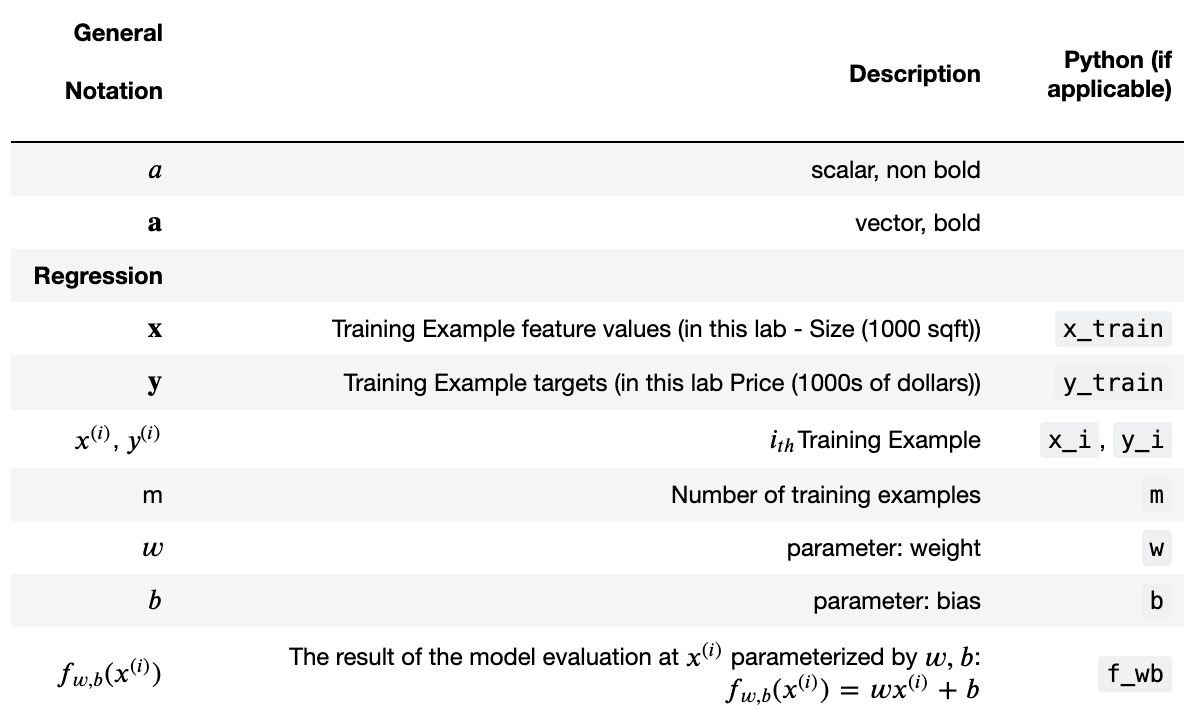

As in the lecture, you will use the motivating example of housing price prediction.
This lab will use a simple data set with only two data points - a house with 1000 square feet(sqft) sold for $300,000 and a house with 2000 square feet sold for $500,000. These two points will constitute our data or training set. In this lab, the units of size are 1000 sqft and the units of price are 1000s of dollars.

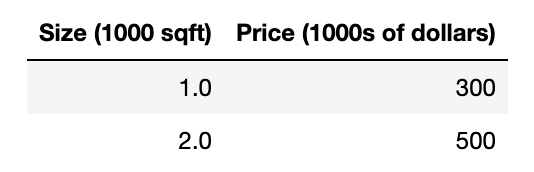

Tools : numpy, pyplot

1. NumPy (넘파이)
"벡터/행렬 연산을 빠르게 처리하는 라이브러리"

핵심 객체: ndarray (N-dimensional Array, 다차원 배열)

주요 기능: 벡터화 연산, 브로드캐스팅, 선형 대수 연산 등



```
import numpy as np  # 관례적으로 np로 임포트

# 1. 배열 생성 (벡터/행렬)
a = np.array([1, 2, 3])  # 1차원 벡터
b = np.array([[1, 2], [3, 4]])  # 2차원 행렬

# 2. 기본 연산 (벡터처럼 동작)
c = a + 1  # 모든 요소에 +1 (브로드캐스팅)
d = a * 2  # 모든 요소 ×2

# 3. 행렬 연산
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
C = A @ B  # 행렬 곱 (A × B)

# 4. 유용한 함수들
np.sum(a)  # 합계
np.mean(a)  # 평균
np.linspace(0, 10, 5)  # 0부터 10까지 5개 구간으로 나눔
```

2. PyPlot (Matplotlib.pyplot)
"데이터를 그래프로 시각화하는 라이브러리"

MATLAB 스타일의 간단한 플롯팅 인터페이스 제공

```
import matplotlib.pyplot as plt

# 1. 선 그래프 (벡터 x, y 입력)
x = np.linspace(0, 10, 100)  # 0~10까지 100개 점 생성
y = np.sin(x)  # 사인 함수 적용

plt.plot(x, y, label="sin(x)")  # 그래프 그리기
plt.xlabel("x")  # x축 레이블
plt.ylabel("y")  # y축 레이블
plt.title("Sine Wave")  # 제목
plt.legend()  # 범례 표시
plt.show()  # 그래프 출력

# 2. 산점도 (Scatter Plot)
x = np.random.rand(50)  # 0~1 사이 무작위 값 50개
y = np.random.rand(50)
plt.scatter(x, y, color="red")
plt.show()

# 3. 히스토그램
data = np.random.randn(1000)  # 정규분포 난수 1000개
plt.hist(data, bins=30)  # 30개의 구간으로 나눔
plt.show()
```


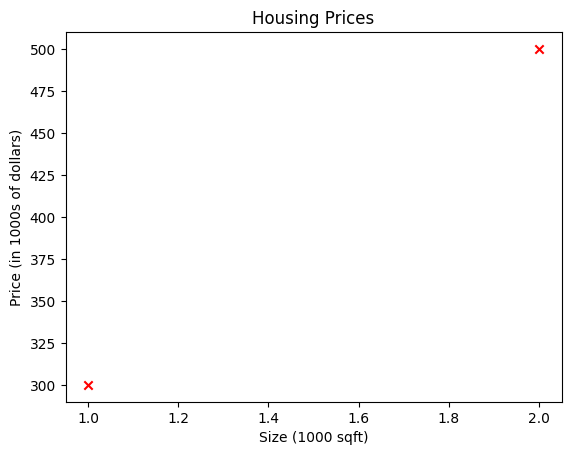

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# x_train is the input variable (size in 1000 square feet)
# y_train is the target (price in 1000s of dollars)

x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.show()

𝑓𝑤,𝑏(𝑥^(𝑖))=𝑤𝑥^(𝑖)+𝑏

The formula above is how you can represent straight lines - different values of  𝑤
  and  𝑏
  give you different straight lines on the plot.





Let's try to get a better intuition for this through the code blocks below. Let's start with  𝑤=100
  and  𝑏=100
 .

In [ ]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples
      w,b (scalar)    : model parameters
    Returns
      f_wb (ndarray (m,)): model prediction
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b

    return f_wb

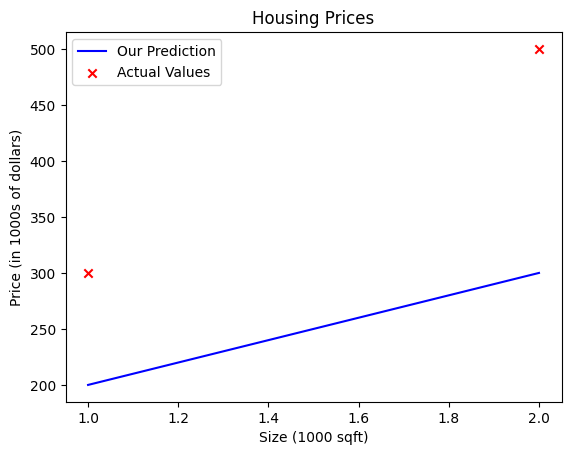

In [ ]:
w = 100
b = 100
tmp_f_wb = compute_model_output(x_train, w, b)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

As you can see, setting  𝑤=100
  and  𝑏=100
  does not result in a line that fits our data.

Prediction :
Now that we have a model, we can use it to make our original prediction. Let's predict the price of a house with 1200 sqft. Since the units of  𝑥
  are in 1000's of sqft,  𝑥
  is 1.2.

In [ ]:
w = 200
b = 100
x_i = 1.2
cost_1200sqft = w * x_i + b

print(f"${cost_1200sqft:.0f} thousand dollars")

$340 thousand dollars


비용 함수
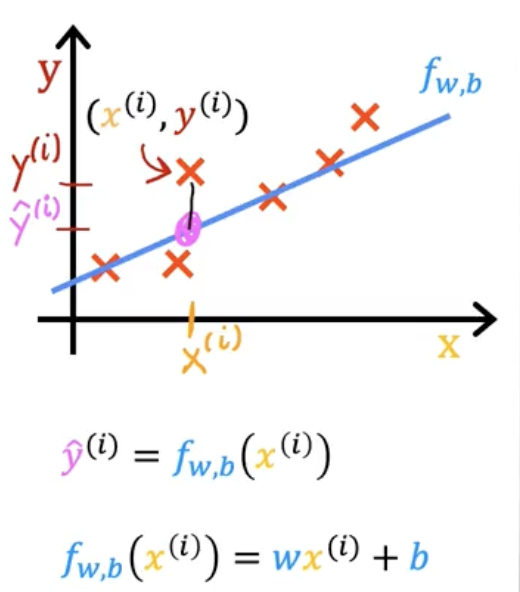

원래 비용 함수 (Mean Squared Error, MSE):
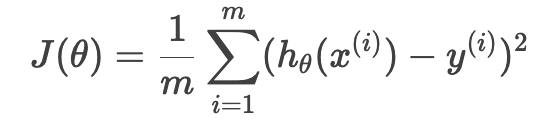

m: 데이터 샘플 수

hθ(x)
: 예측값

y: 실제값

관례적인 수정 (Divide by 2m):
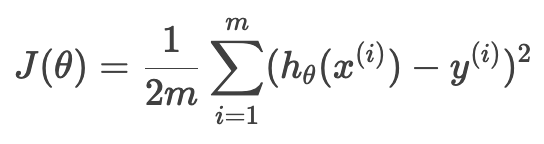
2로 추가로 나누는 이유:

수학적 편의성: 경사 하강법(Gradient Descent)에서 미분 시 제곱 항의 도함수가 2가 나오는데, 이 2와 상쇄되어 계산이 깔끔해진다.
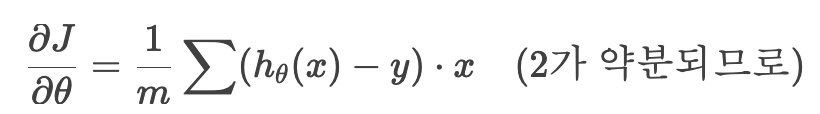

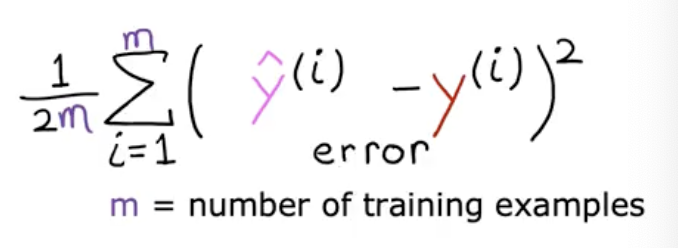

질문

1.왜 비용 함수에서 오차의 제곱을 사용할까?
(1) 오차의 방향을 무시하고 "크기"만 고려하기 위해
(2) 큰 오차에 더 큰 패널티를 주기 위해 → 모델이 큰 오류를 내는 것을 방지하는 효과
(3) 미분의 편의성
  제곱 함수는 미분이 쉽고 최적화 알고리즘(예: 경사 하강법)과 잘 호환된다.
  f(x)=x^2 의 미분: f′(x)=2x (선형 → 계산 간단)
  절댓값 ∣x∣는 x=0 x=0에서 미분 불가능
  📌 "제곱"은 통계학에서 분산(variance)을 계산할 때도 사용되는 자연스러운 선택!

2. 왜 "시그마(Σ)"와 "나누기 m"을 쓰나?
(1) 시그마(Σ)의 역할
  시그마는 모든 데이터 포인트의 오차를 누적하는 역할이다.
  적분이 연속 공간에서의 "합"이라면, 시그마는 이산(discrete) 데이터의 합
(2) 나누기 m (평균화)
  1/m∑은 평균 오차를 계산하는 것입니다.
  데이터 개수(m)에 따라 비용 함수 값이 달라지는 것을 방지해 일관된 스케일을 유지한다.

3. 수학적 최적화 관점
목표: 비용 함수 J(θ)를 최소화하는 θ를 찾는 것.
제곱 오차 함수는 볼록(convex) 함수 → 유일한 최솟값이 보장된다.
절댓값을 쓰면 비볼록(non-convex) 문제가 될 수 있어 최적화가 어려워진다.

4. 다른 대안은 없나?
MAE (Mean Absolute Error):
1/m∑∣h−y∣
장점: 이상치(outliers)에 덜 민감.
단점: 미분 불가능한 점이 있어 최적화 복잡.
Huber Loss: MAE와 MSE를 혼합 (이상치에 강건하면서도 미분 가능).

5. 결론: "제곱"은 머신러닝의 핵심 디자인 선택
오차의 크기를 균일하게 측정 (음수/양수 무시).
큰 오차에 큰 패널티 → 모델이 큰 실수를 피하도록 유도.
미분 쉽고 최적화 간편 → 경사 하강법 등과 궁합이 좋음.

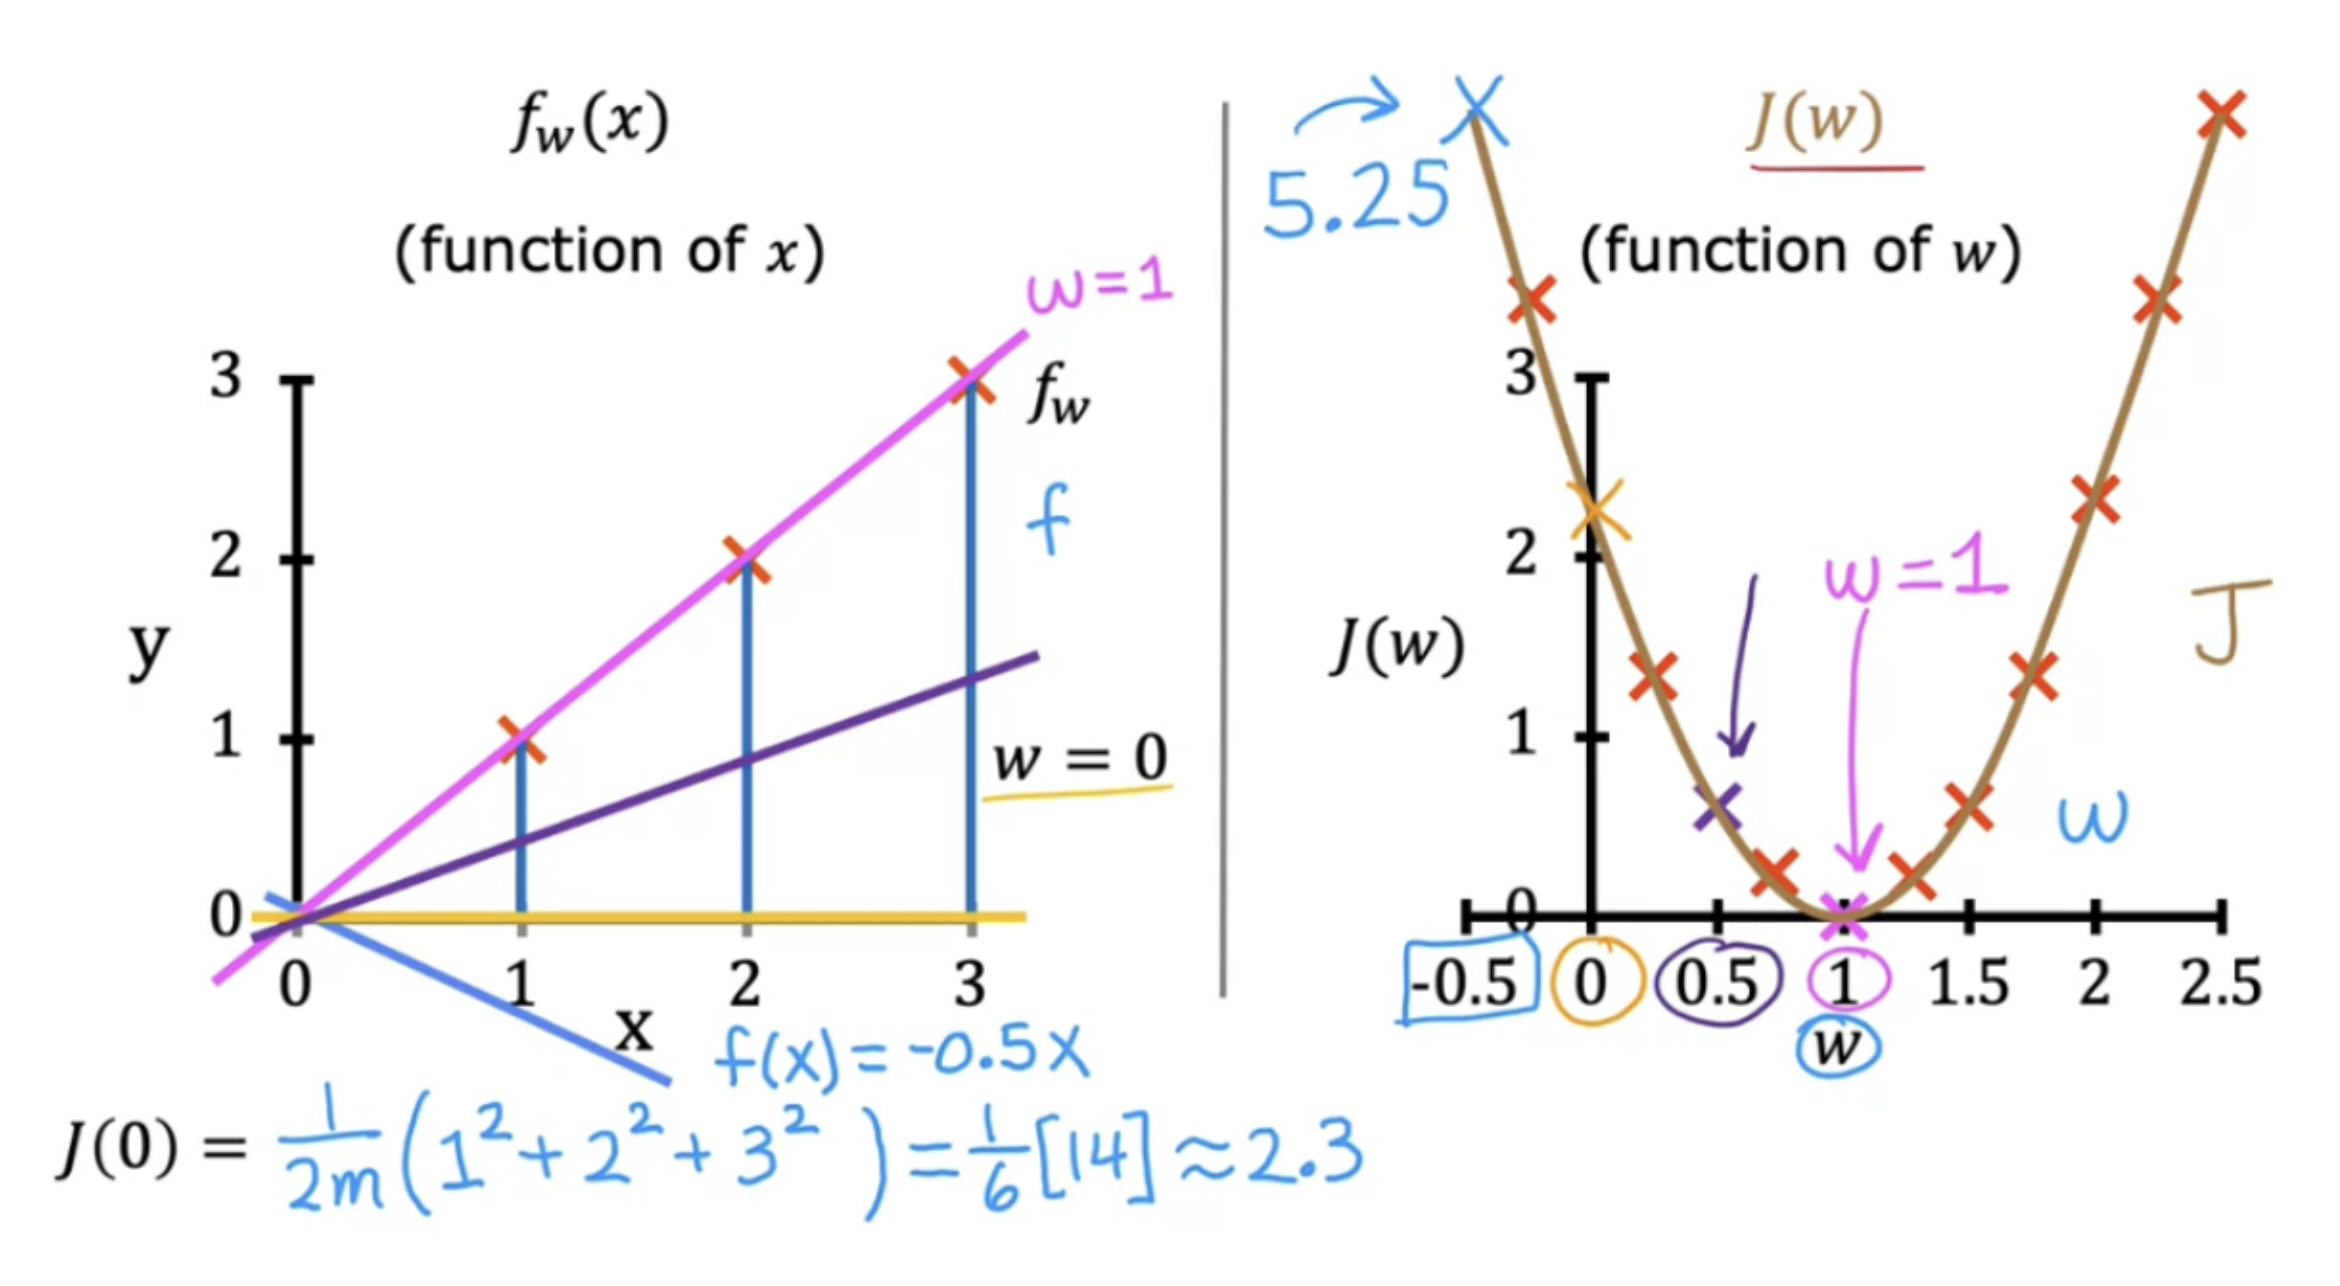


위 그래프는 b가 0이라고 가정하고 그린 그래프이다.
비용 함수
J(w)의 그래프:
w가 변할 때 J(w)는 포물선 형태를 그린다.

최적의 w를 찾을 때, 이 포물선의 최저점을 탐색한다.

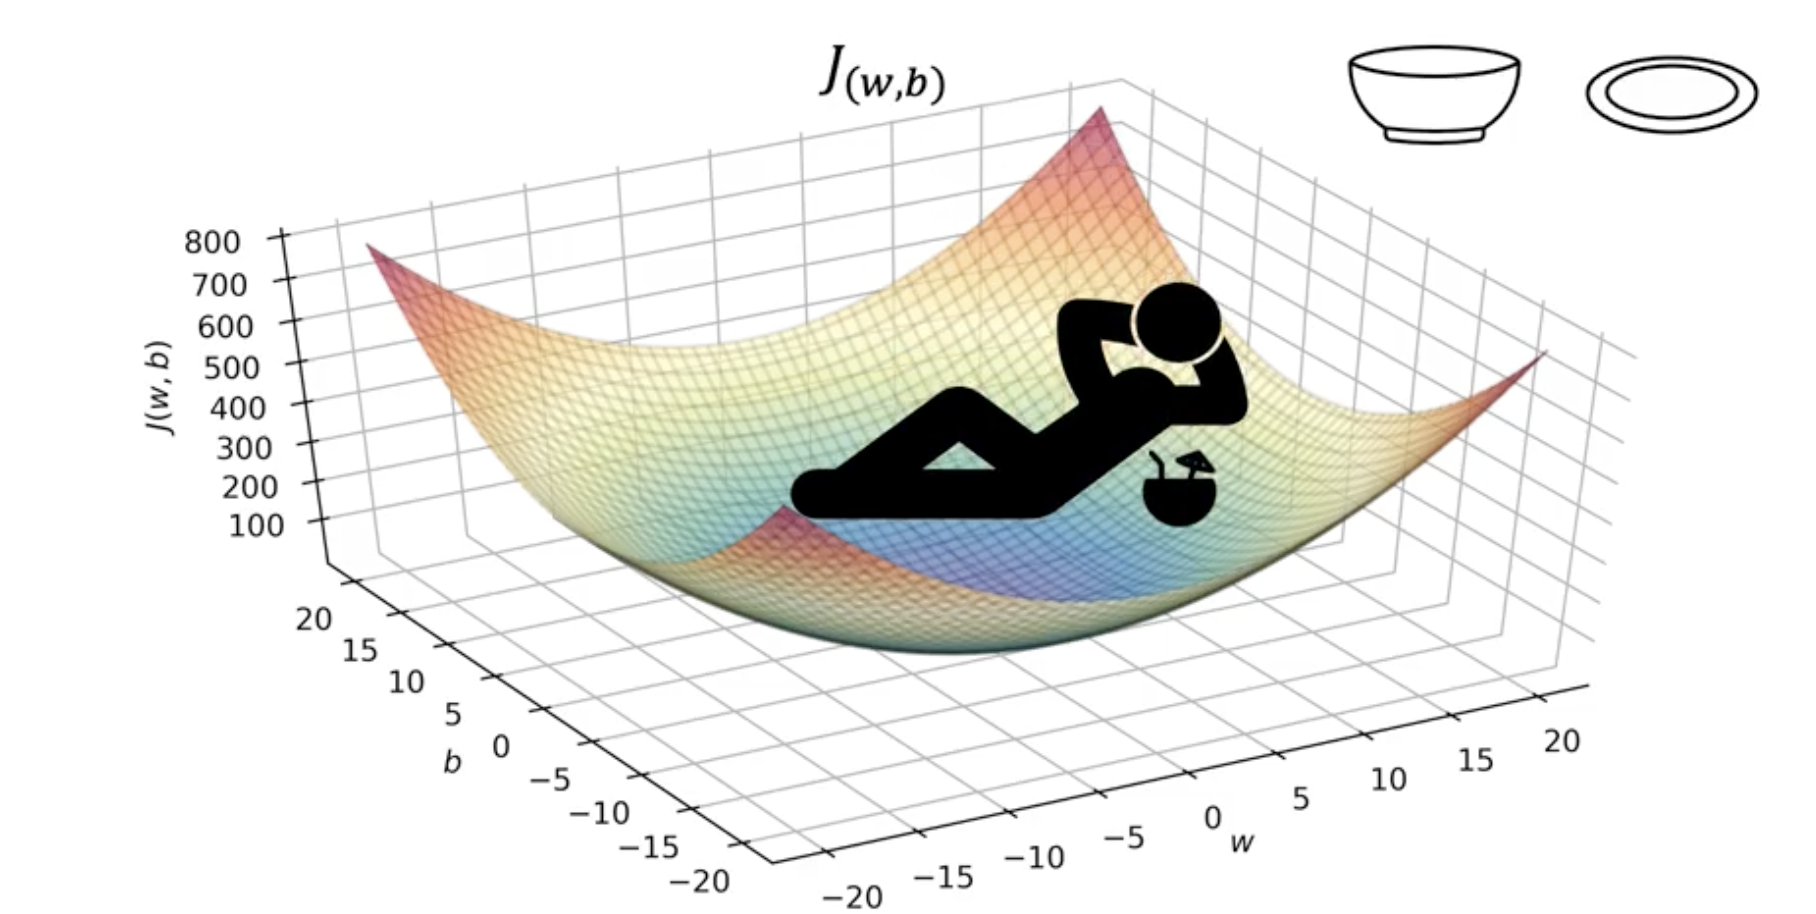

b를 추가하게 된다면 위의 그래프와 같이 해먹같이 생겼다.